**Project Title:**

**Global Demographic Insights: A Comprehensive Data Cleaning and Exploration of World Population Trends**


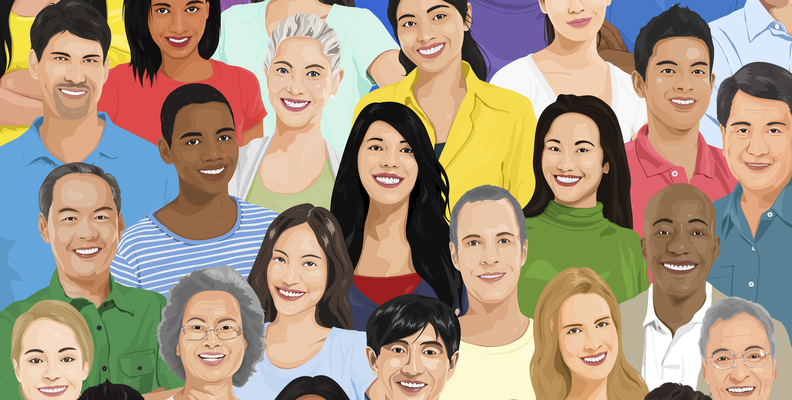





**Introduction**

The primary objective of this project is to thoroughly explore and refine a world population dataset spanning eight years between 1970 and 2022, encompassing all countries across the seven continents.

[Population data link ](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset?resource=download)

The implementation of this project involves the utilization of essential libraries, including pandas, numpy, matplotlib.pyplot, and seaborn.
The insights extracted from this analysis will inform the planning and allocation of resources for countries and continents based on their population growth rates. Recognizing the profound impact of population dynamics on the achievement of the 2030 Agenda which encompasses  the 17 SDGs, the project aims to contribute to the global effort in fulfilling these goals by providing informed and data-driven recommendations.

The column present in the data are:


* Rank: Rank by Population.
* CCA3: 3 Digit Country/Territories Code.
* Country/Territories: Name of the Country/Territories.
* Capital: Name of the Capital.
* Continent: Name of the Continent.
* 2022 Population: Population of the Country/Territories in the year 2022.
* 2020 Population: Population of the Country/Territories in the year 2020.
* 2015 Population: Population of the Country/Territories in the year 2015.
* 2010 Population: Population of the Country/Territories in the year 2010.
* 2000 Population: Population of the Country/Territories in the year 2000.
* 1990 Population: Population of the Country/Territories in the year 1990.
* 1980 Population: Population of the Country/Territories in the year 1980.
* 1970 Population: Population of the Country/Territories in the year 1970.
* Area (km²): Area size of the Country/Territories in square kilometer.
* Density (per km²): Population Density per square kilometer.
* Growth Rate: Population Growth Rate by Country/Territories.
* World Population Percentage: The population percentage by each Country/Territories.

In [ ]:
#import libaries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import data
world_population = pd.read_csv('world_population.csv')

**Let's have a glimpse of the data**

In [ ]:
world_population.head()

,Country_Code,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00


**Information about the dataset**

In [ ]:
world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [ ]:
world_population.describe()

,Rank,Country_Code,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,geometry
count,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,0
unique,234,234,234,234,6,231,234,231,228,228,230,230,231,232,231,179,70,0
top,36,AFG,Afghanistan,Kabul,Africa,,38972230,,,,,,,21,,1.0038,0,NaN
freq,1,1,1,1,57,4,1,4,7,7,5,5,4,2,4,4,57,NaN


**Data Cleaning**

Data cleaning plays a pivotal role in this project, involving actions such as modifying data types in specific columns, standardizing text data, renaming columns, eliminating duplicates, handling null values, and identifying outliers. These cleaning tasks, achieved through various functions, aim to establish uniformity in the dataset, enhance readability, and prepare it for subsequent analysis

In [ ]:
# to display value in 2 decimal places rather than in scientific form
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
world_population.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [ ]:
# Standardize the text data in 'Continent' column
world_population['Continent'] = world_population['Continent'].str.strip()

print(world_population['Continent'].head)

<bound method NDFrame.head of 0         Asia
1       Europe
2       Africa
3      Oceania
4       Europe
        ...   
229    Oceania
230     Africa
231       Asia
232     Africa
233     Africa
Name: Continent, Length: 234, dtype: object>


In [ ]:
# Print the column names of the DataFrame
print(world_population.columns)

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')


In [ ]:
world_population = world_population.drop(columns=[
    'Rank'])

In [ ]:
#Rename Population Columns
world_population = world_population.rename(columns=
    {'CCA3':'Country_Code'}
)

In [ ]:
#checking for null values
world_population.isnull().sum()

Country_Code                   0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [ ]:
# Remove duplicate values
world_population.duplicated().sum()

0

In [ ]:
#display continents, countries and number of occurence
continent_counts = world_population['Continent'].value_counts()
continent_counts



Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

In [ ]:
world_population.dtypes

Country_Code                    object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [ ]:
# List of columns to change data type
columns_to_convert = ['2022 Population', '2020 Population', '2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']

# Convert selected columns to nullable integer type
for col in columns_to_convert:
    world_population[col] = world_population[col].astype('Int64')

world_population.dtypes

Country_Code                    object
Country                         object
Capital                         object
Continent                       object
2022 Population                  Int64
2020 Population                  Int64
2015 Population                  Int64
2010 Population                  Int64
2000 Population                  Int64
1990 Population                  Int64
1980 Population                  Int64
1970 Population                  Int64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

**Can we identify any outliers in the dataset?**

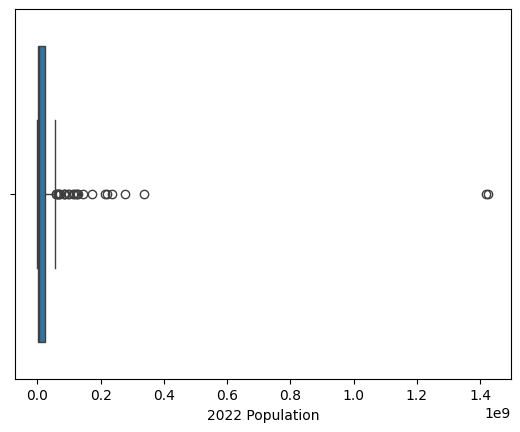

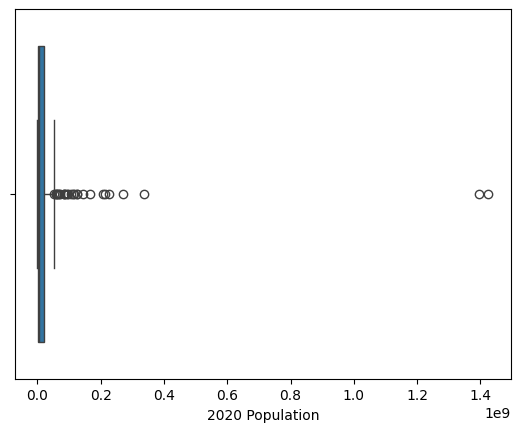

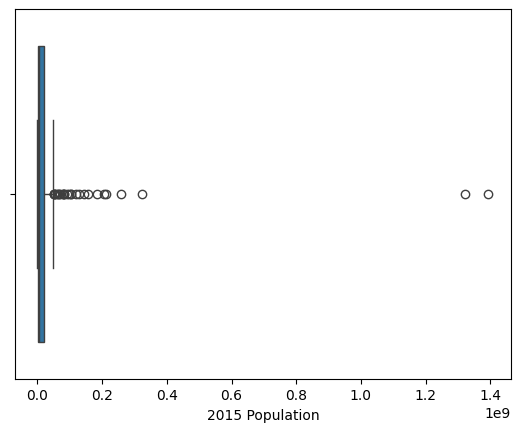

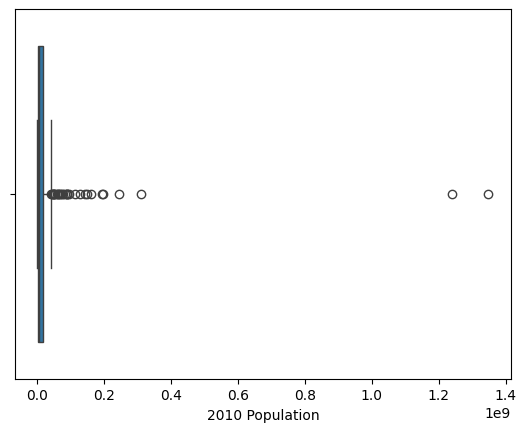

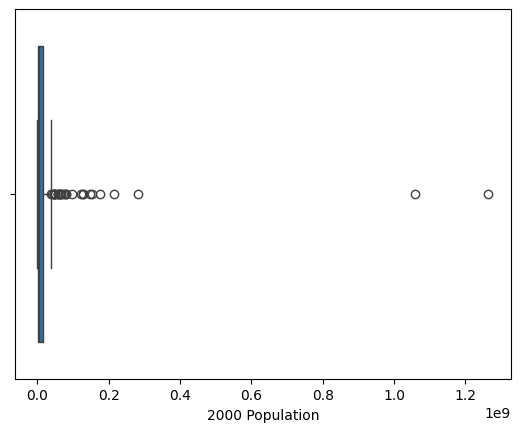

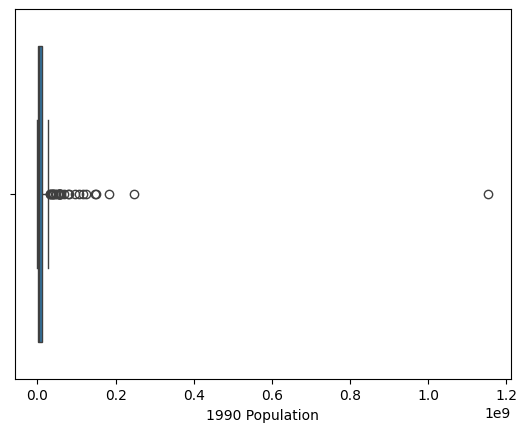

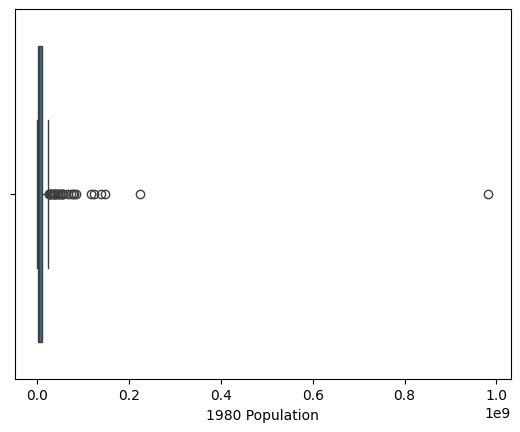

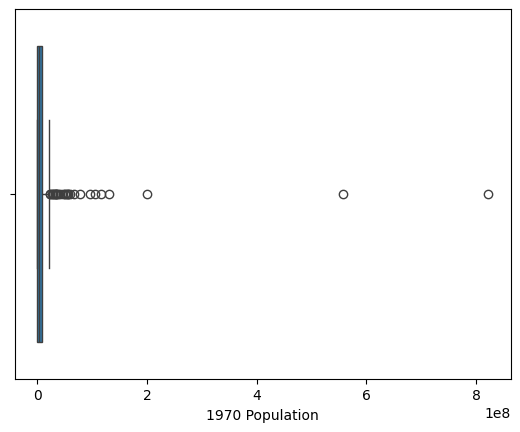

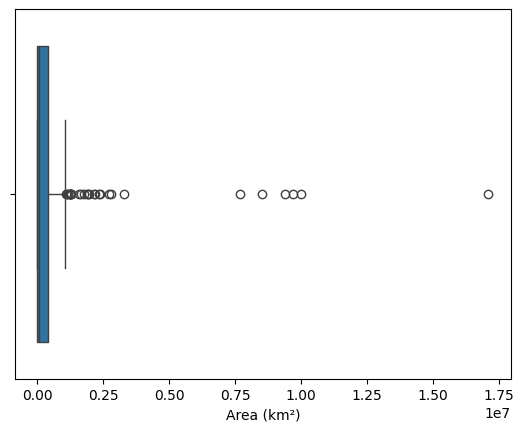

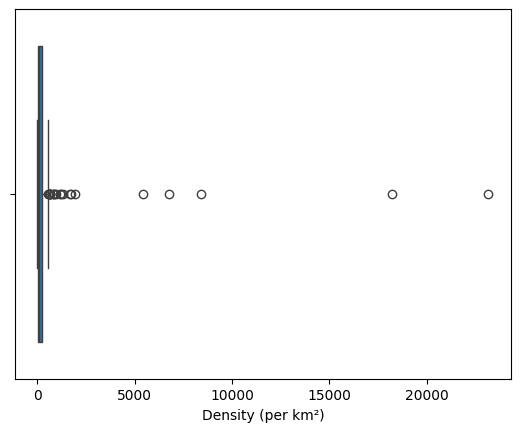

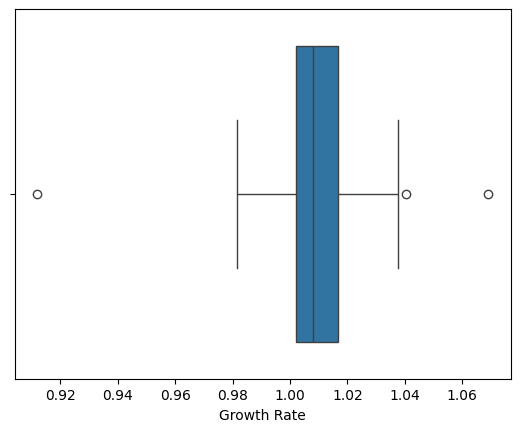

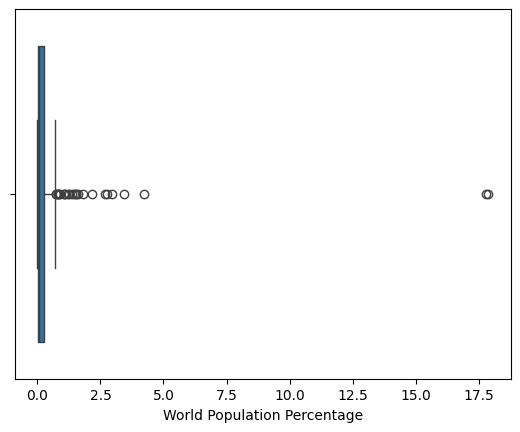

Number of outliers in 2022 Population: 2
Number of outliers in 2020 Population: 2
Number of outliers in 2015 Population: 2
Number of outliers in 2010 Population: 2
Number of outliers in 2000 Population: 2
Number of outliers in 1990 Population: 1
Number of outliers in 1980 Population: 1
Number of outliers in 1970 Population: 2
Number of outliers in Area (km²): 6
Number of outliers in Density (per km²): 4
Number of outliers in Growth Rate: 2
Number of outliers in World Population Percentage: 2


In [ ]:
# outliers

# Create a boxplot for each numeric column
for col in world_population.select_dtypes(include=["int", "float"]):
    sns.boxplot(x=world_population[col])
    plt.show()

# Calculate the z-score for each numeric column
for col in world_population.select_dtypes(include=["int", "float"]):
    z_scores = (world_population[col] - world_population[col].mean()) / world_population[col].std()

    # Identify outliers based on a threshold (e.g., z-score > 3)
    outliers = world_population[abs(z_scores) > 3]

    # Print the number of outliers for each column
    print(f"Number of outliers in {col}: {outliers.shape[0]}")


In [ ]:
# unique values

world_population.nunique()


Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

# Data Exploration
For data exploration, a comprehensive set of statistical and visual tools have been employed. Descriptive statistics, correlation analysis (pairwise correlation, heat map), and various visualization techniques (histograms, scatter plots, box plots, pie charts, line plots) have been leveraged to condense the dataset into meaningful summaries through statistics and visuals, facilitating the extraction of insights.

**Which country has the highest population?**

In [ ]:
#Population by country
world_population.sort_values(by="World Population Percentage", ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498.00,213196304.00,205188205.00,196353492.00,175873720.00,150706446.00,122288383.00,96369875.00,8515767.00,25.28,1.00,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
171,9,RUS,Russia,Moscow,Europe,144713314.00,145617329.00,144668389.00,143242599.00,146844839.00,148005704.00,138257420.00,130093010.00,17098242.00,8.46,1.00,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125.00,125998302.00,120149897.00,112532401.00,97873442.00,81720428.00,67705186.00,50289306.00,1964375.00,64.91,1.01,1.60


**Which country experienced the highest population growth rate between 1970 and 2022?**

In [ ]:
#Growth Rate by continent
world_population.groupby(['Continent']).sum().sort_values(by="Growth Rate", ascending=False).head(10)

<ipython-input-6-68901ccddc10>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  world_population.groupby(['Continent']).sum().sort_values(by="Growth Rate", ascending=False).head(10)


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,5253,1425529262.00,1360671810.00,1156663993.00,1020502655.00,817508493.00,637110013.00,480817791.00,361194640.00,30121241.00,6952.36,57.19,17.87
Asia,3878,4720041978.00,4652801584.00,4458250182.00,4187125190.00,3706718415.00,2334719776.00,1933360000.00,2104314136.00,32138141.00,51251.21,50.47,59.19
Europe,6225,737713219.00,745792196.00,736345252.00,735613934.00,726066600.00,709689789.00,681600217.00,655923991.00,23010411.00,33166.24,50.11,9.33
North America,6437,600296136.00,594236593.00,570383850.00,542720651.00,486069584.00,421266425.00,368293361.00,315434606.00,24244178.00,10354.78,39.17,7.51
Oceania,4336,45020499.00,43933426.00,40403283.00,37102764.00,31222778.00,26743822.00,22920240.00,19480270.00,8515081.00,3048.49,23.17,0.55
South America,1366,436816608.00,431530043.00,413134396.00,348262142.00,325206553.00,297146415.00,241789006.00,192947156.00,16916937.00,293.61,14.11,5.48


**Can we identify any correlations between a 1970-2022 population and Area, Density and Growth rate?**

In [ ]:
#Computing Pairwise correlation
world_population.corr()


<ipython-input-41-4c16a2a69331>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  world_population.corr()


,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
2022 Population,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45
Density (per km²),-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.06,1.00,-0.07,-0.03


<ipython-input-45-b6039edfb3b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(world_population.corr(),annot=True)


<Axes: >

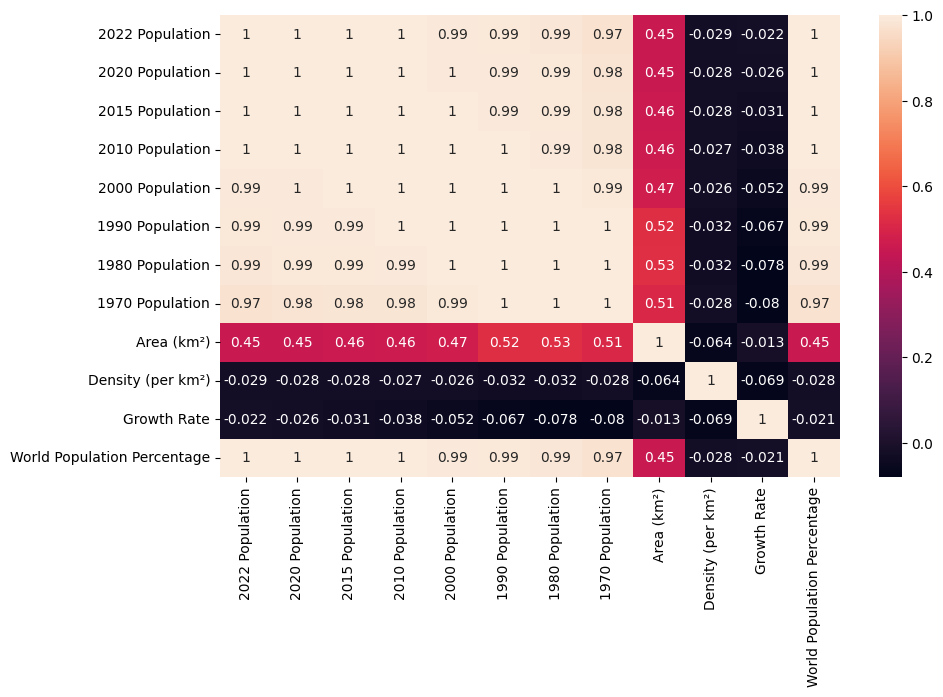

In [ ]:
#plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(world_population.corr(),annot=True)


<ipython-input-16-b91c0e2ed09a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Continent']).sum()['2022 Population'].sort_values(ascending=False).plot(kind='bar', color='maroon', title= '2022 Population Distribution by Continents', y='Population in Billions')


<Axes: title={'center': '2022 Population Distribution by Continents'}, xlabel='Continent'>

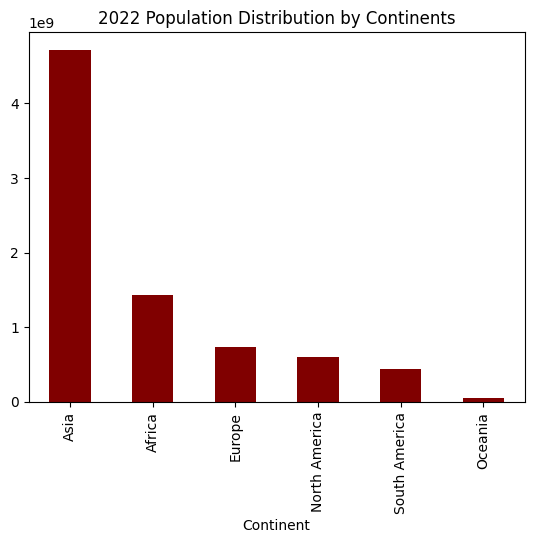

In [ ]:
#plot a bar chart showing 2022 population by continent

world_population.groupby(['Continent']).sum()['2022 Population'].sort_values(ascending=False).plot(kind='bar', color='maroon', title= '2022 Population Distribution by Continents', y='Population in Billions')


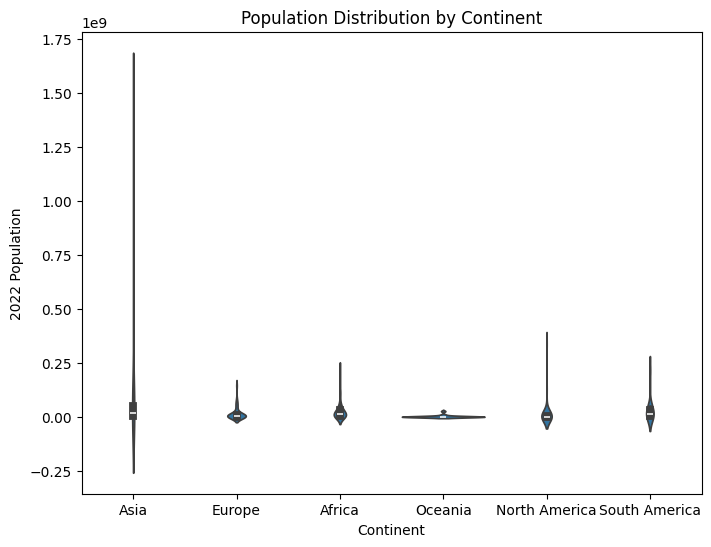

In [ ]:
#violin plot - population distribution by continent
plt.figure(figsize=(8, 6))
sns.violinplot(x='Continent', y='2022 Population', data=world_population)
plt.title('Population Distribution by Continent')
plt.show()

<Axes: ylabel='World Population Percentage'>

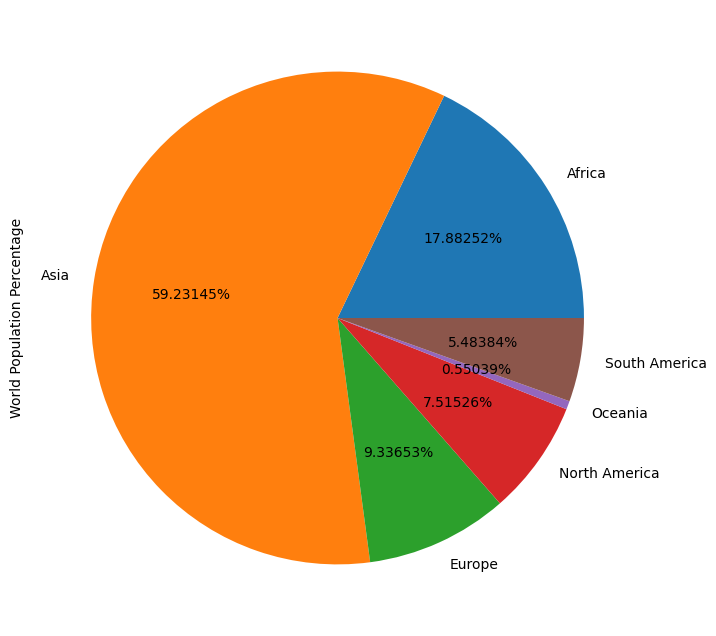

In [ ]:
#Pie chart of world population percentage by continent

world_population.groupby('Continent')['World Population Percentage'].sum().plot(kind='pie', autopct='%1.5f%%', figsize=(10, 8))


In [ ]:
#sorting continents by population

world_population2 = world_population.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean().sort_values(by="2022 Population",ascending=False).transpose()

world_population2


Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32


**Are there Continents with significant decline in population between 1970 and 2022?**

<Axes: >

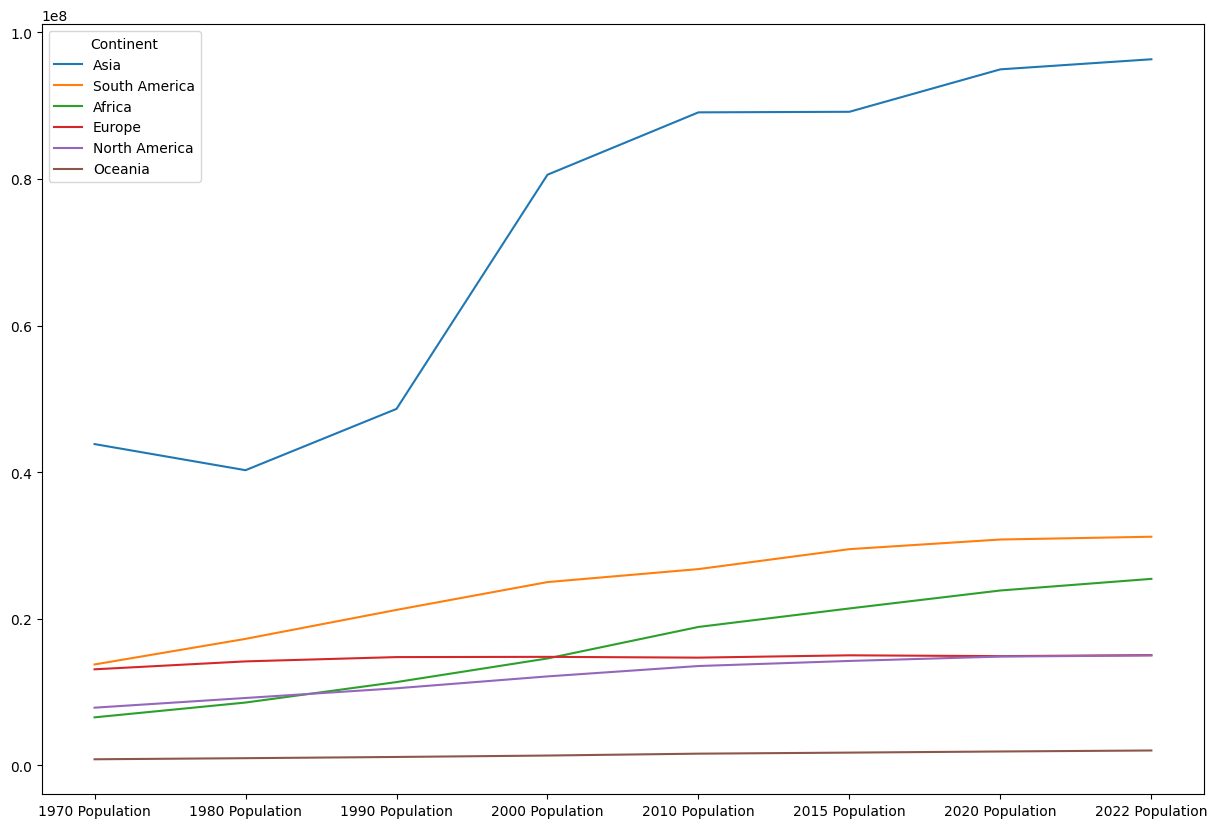

In [ ]:
world_population2.plot(figsize=(15,10))

<Axes: >

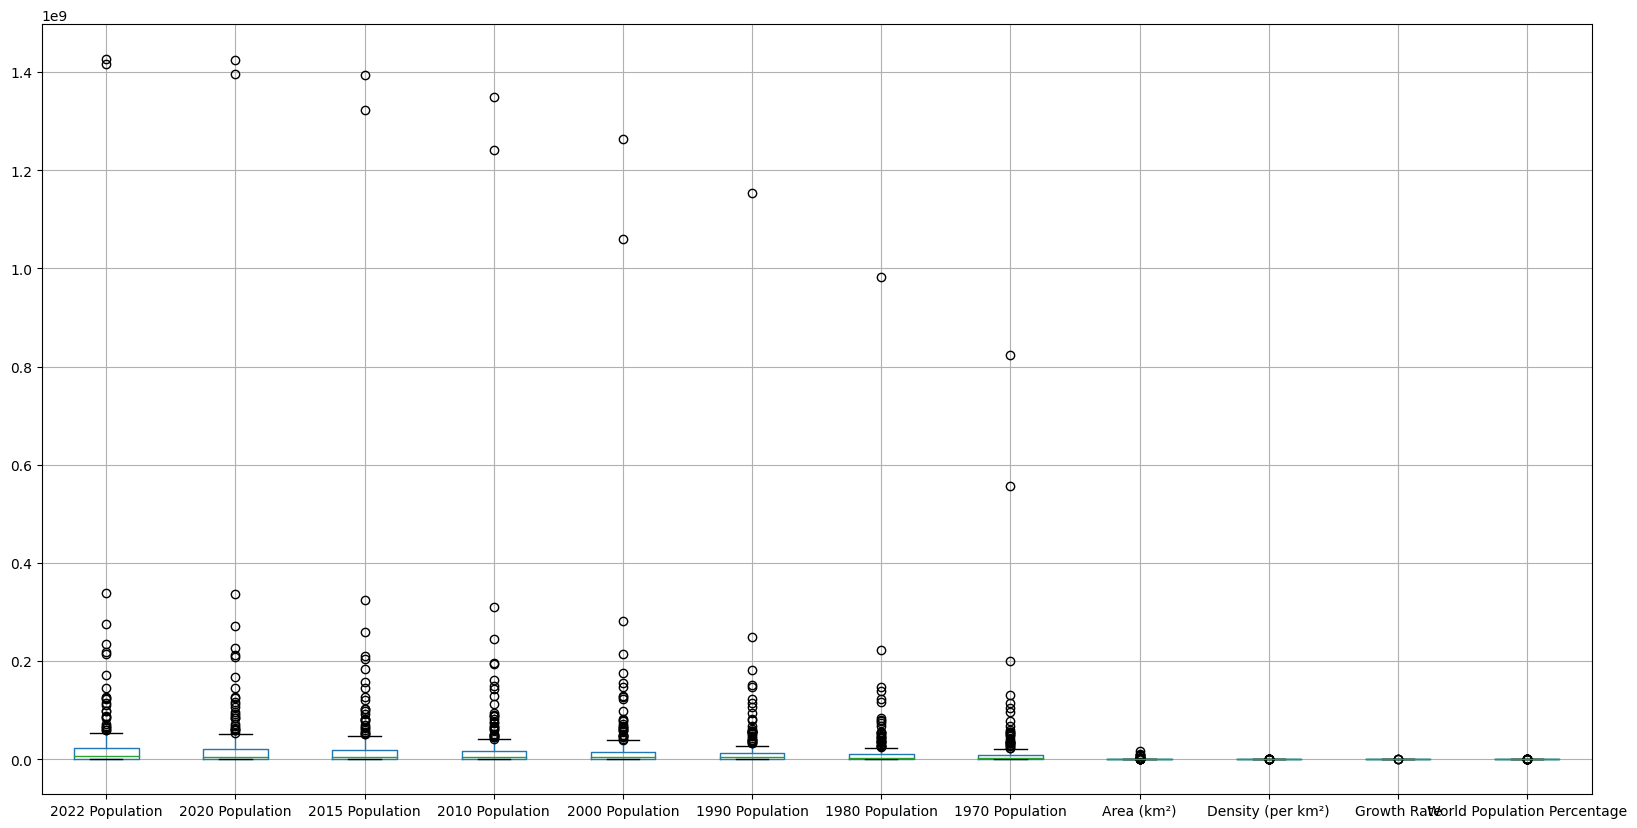

In [ ]:
 #box plot of world population
world_population.boxplot(figsize=(20,10))

<ipython-input-48-fc18992bce9e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(data=df.groupby('Continent').sum(), x="Area (km²)", y="World Population Percentage", hue= "Continent", size= "Continent")


Text(0.5, 1.0, 'correlation between Area (km²) and World Population Percentage')

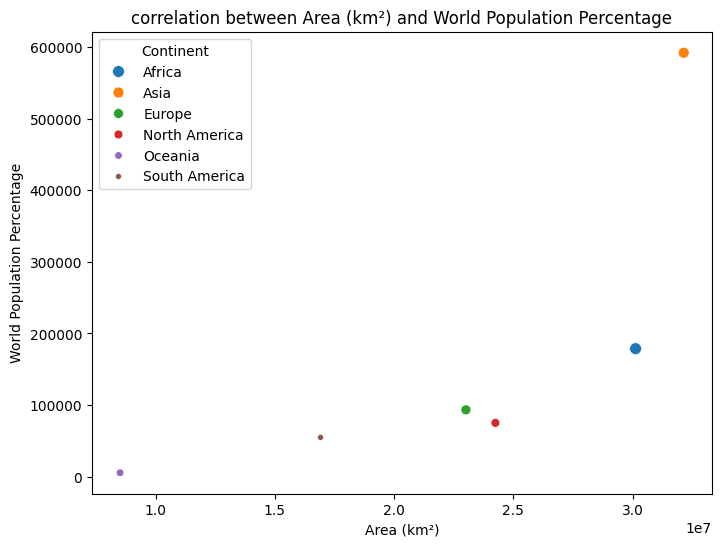

In [ ]:
#scatterplot showing correlation between the Continent's Area(km2) and its World Population Percentage
plt.figure(figsize= (8,6))
sns.scatterplot(data=world_population.groupby('Continent').sum(), x="Area (km²)", y="World Population Percentage", hue= "Continent", size= "Continent")
plt.title("correlation between Area (km²) and World Population Percentage")

In [ ]:
#1970 Population by Continent
world_population.groupby('Continent')['1970 Population'].sum()

Continent
Africa           361194640.00
Asia            2104314136.00
Europe           655923991.00
North America    315434606.00
Oceania           19480270.00
South America    192947156.00
Name: 1970 Population, dtype: float64

In [ ]:
#2022 Population by Continent
world_population.groupby('Continent')['2022 Population'].sum()

Continent
Africa          1425529262.00
Asia            4720041978.00
Europe           737713219.00
North America    600296136.00
Oceania           45020499.00
South America    436816608.00
Name: 2022 Population, dtype: float64

<ipython-input-49-a5d09461fc96>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(data=df.groupby('Continent').sum(), x="1970 Population", y="2022 Population", hue= "Continent", size= "Continent")


Text(0.5, 1.0, 'correlation between 1970 and 2022 Population')

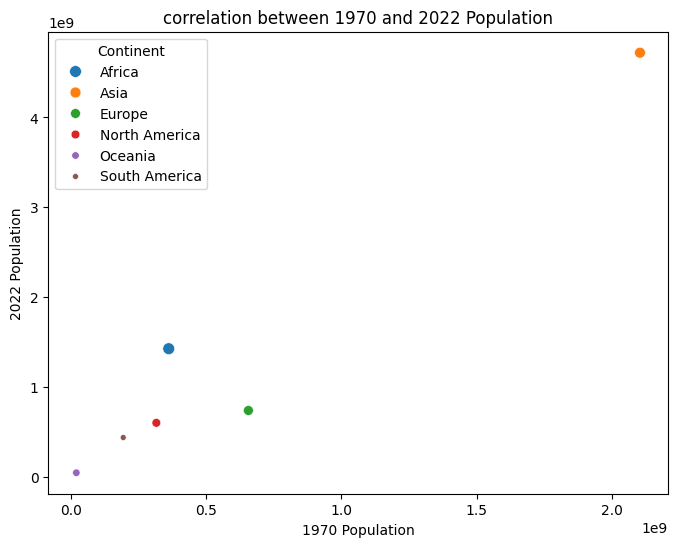

In [ ]:
#Visualizing the correlation between a Continent's population in 1970 & 2022 using Scatterplot
plt.figure(figsize= (8,6))
sns.scatterplot(data=world_population.groupby('Continent').sum(), x="1970 Population", y="2022 Population", hue= "Continent", size= "Continent")
plt.title("correlation between 1970 and 2022 Population")

**Insights and Recommendations**

The insights gained from this analysis can significantly influence resource planning for countries and continents:

1. **Tailored Resource Allocation:** Recognizing that China holds the highest population percentage globally at 17.88%, resource planners can focus on developing strategies to efficiently allocate resources based on this significant demographic.

2. **Consideration of Geographical Factors:** Understanding the weak positive correlation between a country's area and its population can guide resource planners to consider both population density and geographic size when planning resource distribution.

3. **Population Growth Trends:** The identified strong correlation between populations over the years is a crucial insight. Planners can anticipate future population changes and align resource allocation strategies accordingly.

4. **Efficient Growth Strategies:** The negative weak correlation between growth rate/density per km and population suggests that population growth doesn't strongly affect the overall population over the years. This insight can guide planners to develop growth strategies that balance population dynamics and resource allocation.

5. **Continent-Specific Strategies:** Acknowledging that Asia constitutes 59.23% of the world population, planners can design continent-specific resource strategies, recognizing the varying demographic landscapes across continents. For instance, Africa's population growth presents an opportunity for tailored interventions.

6. **Understanding Population Shifts:** Observing that Africa's population has grown significantly over the years, moving from the 5th to the 2nd most populated continent, highlights the importance of dynamic planning to address changing demographics.

7. **Strategic Consideration of Area Size:** The positive correlation between area size and world percentage suggests that larger areas tend to contribute more to the overall world population. This insight can inform global resource planning strategies.

8. **Tailored Interventions for Specific Countries:** Recognizing Russia as the country with the highest area and Vatican City as the lowest, planners can design specific interventions based on the unique characteristics and needs of countries with diverse sizes.

In essence, these insights offer a roadmap for strategic resource planning that is not only tailored to current demographic realities but is also forward-looking, anticipating shifts and changes in population dynamics.



**Conclusion**

In conclusion, this Python project has provided valuable insights into the world's population dynamics, leveraging data analysis techniques to uncover trends and patterns. Through meticulous data processing, visualization, and interpretation, we have gained a deeper understanding of the factors influencing population growth and distribution.

One of the key findings of this project is the apparent correlation between economic development and population growth rates. By examining the data over the past decades, we observed a shift in population trends, with developed countries experiencing slower growth while emerging economies show a more dynamic demographic landscape. This underscores the interconnectedness of socio-economic factors and demographic patterns.

This project serves as a testament to the potential of data-driven insights in addressing global challenges. By harnessing the power of Python and data analysis, we have unraveled the intricate story of world population trends, contributing to the broader discourse on the intricate relationship between human societies and their demographic evolution.

**Contribution of Team Members**

1. Introduction, data cleaning functions like checking for null values, group by functions  - **Dorah Buteme**

2. Import libraries needed, read data to file, first level check of data to be used such as df.info, df.describe, df.**head** - **Temitope Olatidoye**

3. Data cleaning functions - standardize text data, removing unnecessary column, renaming columns, sorting columns - **Jumoke Olufemi**

4. Sourcing datasets, changing values from standard form to decimal values, line plot, box plot - **Tobi Oguntolu**

5. Data cleaning -  categorical data - continent counts, data type conversion - **Lynatte Nantunga**

6. Data cleaning - checking for duplicates, Checking for outliers, using the zscore, unique values - **Adanma Iheanacho**

7. Data Exploration -bar chart,violin plot,pie chart -  **Khadijat Agboola**

8. Correlation analysis, heat map, scatter plot - **Kafayat Azeez-Fashola**

9. Group by functions, transpose function, insights from analyis - **Hamidat Mohammed**